# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 6</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


### Gráficos

In [2]:
# Instala a versão exata do pacote matplotlib
!pip install -q -U matplotlib==3.2.1

In [3]:
import matplotlib as mat
mat.__version__

'3.2.1'

In [2]:
import sqlite3
import random
import datetime
import matplotlib.pyplot as plt
# Criar grafico apenas na tela do Jupyter Notebook
%matplotlib notebook 
 
# Criando uma conexão
conn = sqlite3.connect('dsa.db')   

# Criando um cursor
c = conn.cursor()
 
# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
     
# Função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(now, 'Teclado', 130 )")
    conn.commit()
    c.close()
    conn.close()
    
# Usando variáveis para inserir dados    
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)
        
# Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 60.0")
    for linha in c.fetchall():
        print(linha)      
        
# Leitura de colunas específicos
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])  
        
# Update
def atualiza_dados():
    c.execute("UPDATE produtos SET valor = 70.00 WHERE valor > 80.0")
    conn.commit()
    
# Delete
def remove_dados():
    c.execute("DELETE FROM produtos WHERE valor = 62.0")
    conn.commit()

# Gerar gráfico com os dados no banco de dados
def dados_grafico():
    c.execute("SELECT id, valor FROM produtos")
    ids = []
    valores = []
    dados = c.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
        
    plt.bar(ids, valores)
    plt.show()

<IPython.core.display.Javascript object>


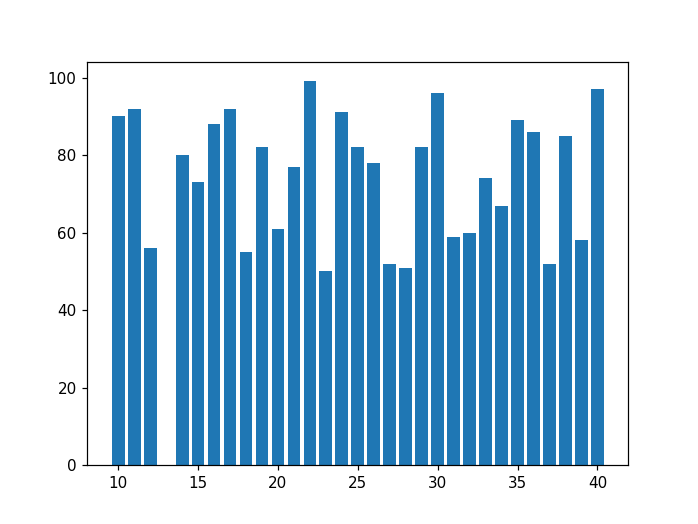

In [3]:
# Gerando gráficos
dados_grafico()